<a href="https://colab.research.google.com/github/uscudum/ML-AS-Multiple-Linear-Regression-Diabetes/blob/main/Regresi%C3%B3n_lineal_m%C3%BAltiple_predicci%C3%B3n_de_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la regresión lineal



Dataset

```
https://www.kaggle.com/code/paultimothymooney/predict-diabetes-from-medical-records/input?select=diabetes.csv
```


## Importanción de datos

In [ ]:
import pandas as pd

df = pd.read_csv('/content/diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

## Entendiendo los datos
Una vez descargados los datos hay que entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por eso empezaremos viendo un gráfico de correlaciones usando **[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** de ***Seaborn***.


```
import seaborn as sns
import matplotlib.pyplot as plt
```



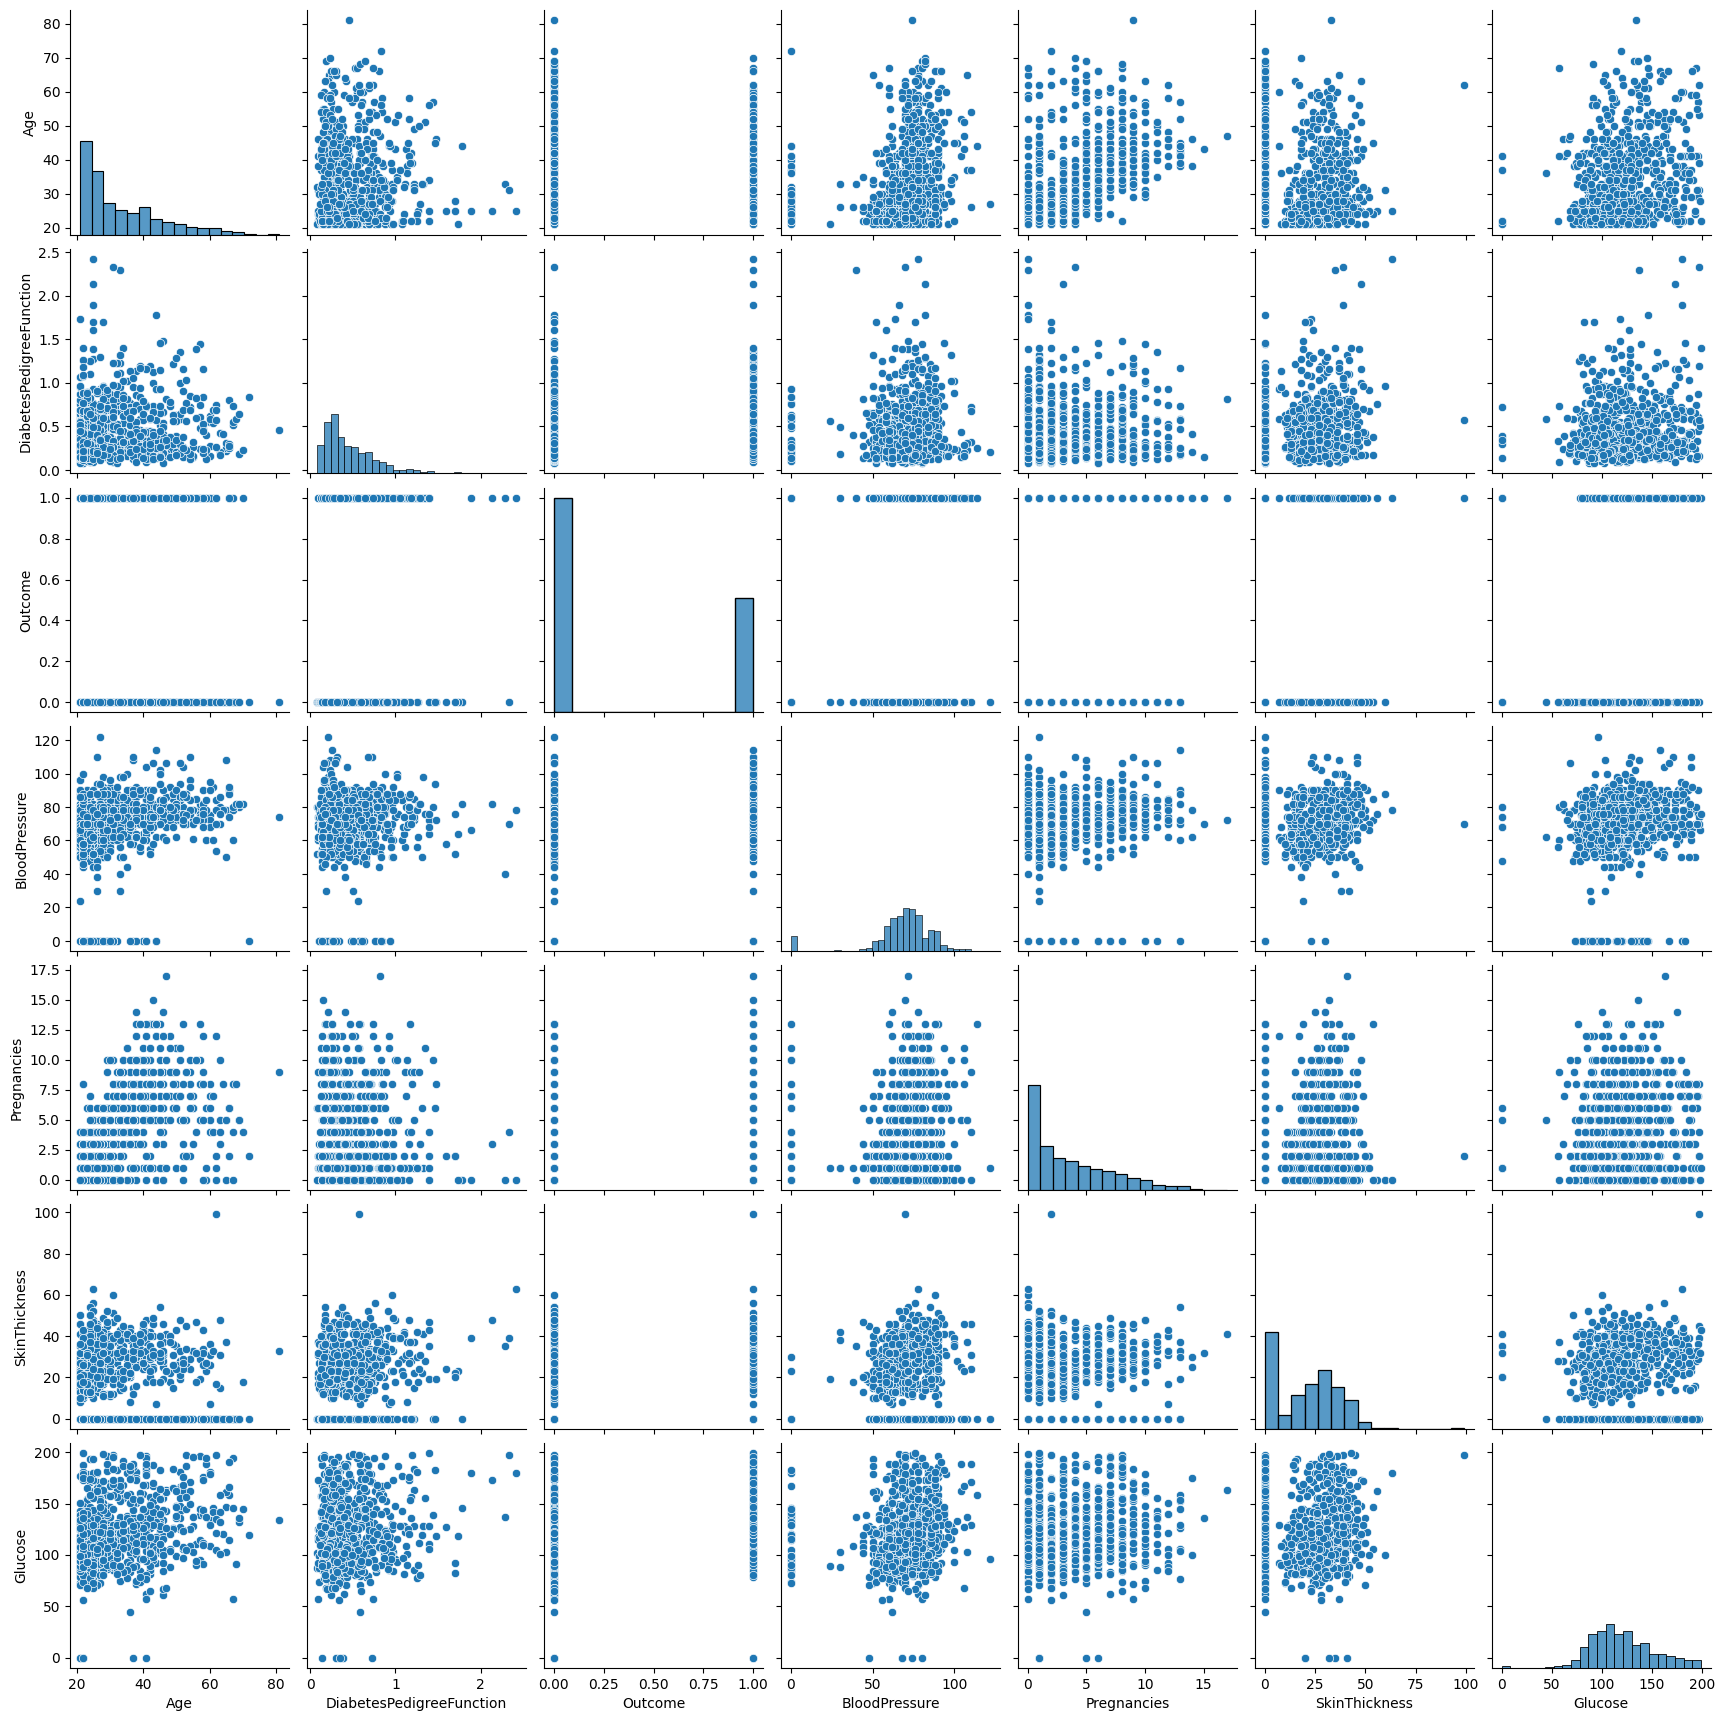

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Age','DiabetesPedigreeFunction','Outcome','BloodPressure','Pregnancies','SkinThickness', 'Glucose']
sns.pairplot(df[cols])
plt.show()

Una vez que vemos cómo están correlacionadas las variables de manera visual, es importante usar un método numérico para poder entender las correlaciones.
usando **[heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)** de ***Seaborn***.

<Axes: >

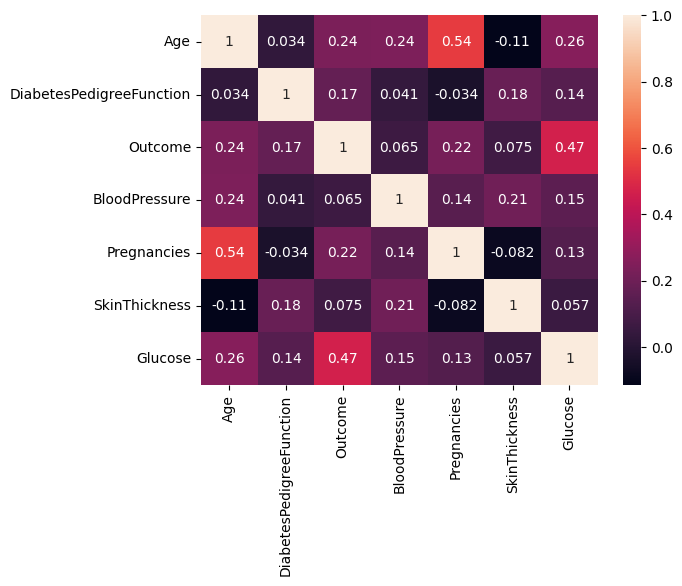

In [ ]:
sns.heatmap(df[cols].corr(), annot=True)

## Creando el modelo con scikit-learn



```
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
```

En X e Y almacenamos los datos que vamos a trabajar (los values de las columnas df['']).

Luego creamos dos variables más para almanear la función StandardScaler()

Para así poder utilizar el fit_transform() en X y en Y para estandarizarlos

Utilizaremos el [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de **skaleran**

Ajustando el modelo con la función **fit**, pasando los argumentos x e y estandarizados



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['Age', 'Pregnancies']].values
Y = df['Outcome'].values.reshape(-1, 1)

ss_x = StandardScaler()
ss_y = StandardScaler()

# Estandaricemos los datos
X_std = ss_x.fit_transform(X)
Y_std = ss_y.fit_transform(Y)

# Creamos el modelo de regresión lineal
lr = LinearRegression()

# Ajustamos la recta pasando por parametro los valores estandarizados
lr.fit(X_std,Y_std)


LinearRegression()

## Generando predicción con el modelo

Utilizamos el método predict


```
lr.predict('argumento estandarizado')
```
Para estandarizar el argumento debemos transformarlo (.transform()) convirtiendo el argumento en un array transformado en 2D np.array(['']).reshape(-1,1)


In [ ]:
import numpy as np
# Aquí podemos usar cualquier valor deseado para las características
age = 35
time = 0

# Transformar las características a su forma estandarizada
entrada_std = ss_x.transform(np.array([[age, time]]))

# Realizar la predicción
salida_std = lr.predict(entrada_std)

# Invertir la transformación para obtener el resultado en la escala original
salida_original = ss_y.inverse_transform(salida_std)

# Mostrar el resultado
print("La probabilidad es de:", round(salida_original[0, 0] * 100), "%")


La probabilidad es de: 29 %
